## Random Forest - Regression Post Class

1. Random Forest Ensemble bir modeldir. Ensemble modellerde birden fazla model birlikte kullanılır. Genelde aynı model seçilir ancak farklı modeller de seçilebilir.


2. En son elde edilen modele metamodel denir.


3. Ensembe modellerde Bagging ve Boosting olarak 2 method vardır :
    - Bagging, input datayı alarak yeni data üretir. Bu datalar modellere girer ve output alınır. Paralel bir process vardır.
    - Boosting'de ise bir seri yapı vardır. Input datadan datalar üretilir ve modele girer. Bir modelin ürettiği sonuç diğer modele girer.
    
    
4. Modeller paralel çalışırsa Bagging, seri çalışırsa Boosting metodunu kullanıyor demektir. Bagging metodunda en çok kullanılan model Random Forest'dır. Boosting metodunda en çok kullanılan modeller Gradient Boosting, XGBoost, CatBoost'dur.


- **Bagging (Bootstrap Aggregating) :** 
    - Bir torba bilyeden bir avuç bilye alıp bir data oluşturduğumuzu ve sonra bilyeleri tekrar çuvala attığımızı ve sonra yeniden bir avuç alıp yeni bir data oluşturduğumuzu düşünebiliriz. Bu şekilde farklı datasetler oluşturuluyor. Sonra bu datasetler üzerinden modeller eğitiliyor, skorları bir araya getiriliyor ve nihai bir skor üretiliyor.
    - Yani kısaca Bootstrap ile küçük datasetleri oluşturup modellere eğitim yaptırıyoruz.
    - Random Forest Bagging Ensemble bir modeldir ve Decision Tree kullanır.
    
    - **Random Forest HyperParameters:**
        - **"n_estimator" :** default değeri 100. Kaç tane model kullanılacağını belirtmek için kullanılır.
        - **"max_depth" :** default değeri None. Karar ağacının ne kadar derin olacağını belirler. Overfitting'i önlemek için kullanılır.
        - **"max_features" :** Split yaparken kaç tane feature kullanılacağını belirlemek için kullanılır.
        - **"bootstrapbool" :** default değeri True. Karar ağacını inşa ederken bootstrap kullanılıp kulllanılmayacağını belirler.
        - **"oob_scorebool" :** False olursa datasetin tamamını kullanır. Küçük bir datasetin varse bunu False yapabilirsin.
    - **Random Forest Algoritmasının Avantajları:**
        1. Multi-class problemler için iyidir.
        2. Tahmin gücü harikadır.
        3. Bu modele data hazırlamak kolaydır. Scaling'e gerek yok. Missing value ve outlier'lar ile mücadele edebilir.
        4. Feature importance rank yapabilir.
        5. Büyük datalarda kullanılabilir.
        6. Decision Tree'den daha güçlüdür.
    - **Random Forest Algoritmasının Dezavantajları:**
        1. Küçük datasetlerinde çok iyi sonuçlar vermez.
        2. Regression, Classification'a göre daha dezavantajlıdır.
        3. Tercüme edilmesi zordur.(Lack of interpretability)
        4. Training işlemi masraflı olabilir.
 


In [153]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams["figure.figsize"] = (9, 5)

import warnings
warnings.filterwarnings("ignore")

pd.set_option("display.max_rows", 1000)
pd.set_option("display.max_columns", 1000)
pd.set_option("display.width", 1000)
pd.set_option("display.float_format", lambda x : "%.3f" % x)

In [154]:
df = pd.read_csv("car_dataset.csv")
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.350,5.590,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.750,9.540,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.250,9.850,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.850,4.150,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.600,6.870,42450,Diesel,Dealer,Manual,0


In [155]:
df.shape
# Bu datasetinde 301 adet gözlem var. Random Forest için çok az bir sayı.

(301, 9)

In [156]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [157]:
df.isnull().any()

Car_Name         False
Year             False
Selling_Price    False
Present_Price    False
Kms_Driven       False
Fuel_Type        False
Seller_Type      False
Transmission     False
Owner            False
dtype: bool

In [158]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000,301.000,301.000,301.000,301.000
mean,2013.628,4.661,7.628,36947.206,0.043
std,2.892,5.083,8.644,38886.884,0.248
min,2003.000,0.100,0.320,500.000,0.000
25%,2012.000,0.900,1.200,15000.000,0.000
50%,2014.000,3.600,6.400,32000.000,0.000
75%,2016.000,6.000,9.900,48767.000,0.000
max,2018.000,35.000,92.600,500000.000,3.000


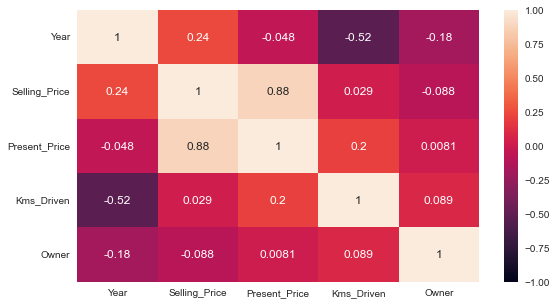

In [159]:
sns.heatmap(df.corr(), annot=True, vmin=-1);
# Present price ile Selling price arasında yüksek korelasyon var ancak modelimiz handle edebilir.

In [160]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.350,5.590,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.750,9.540,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.250,9.850,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.850,4.150,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.600,6.870,42450,Diesel,Dealer,Manual,0


In [161]:
df["vehicle_age"] = 2022 - df["Year"]

In [162]:
df["Car_Name"].value_counts()
# Çok fazla araba modeli var ancak her bir modeli temsil edecek yeterli sayıda örneklem yok.

city                         26
corolla altis                16
verna                        14
fortuner                     11
brio                         10
ciaz                          9
innova                        9
i20                           9
grand i10                     8
jazz                          7
amaze                         7
Royal Enfield Classic 350     7
ertiga                        6
eon                           6
sx4                           6
alto k10                      5
i10                           5
swift                         5
Bajaj Pulsar 150              4
Royal Enfield Thunder 350     4
ritz                          4
wagon r                       4
etios liva                    4
dzire                         4
xcent                         3
etios cross                   3
Royal Enfield Thunder 500     3
TVS Apache RTR 160            3
Yamaha FZ S V 2.0             3
creta                         3
Honda CB Hornet 160R          3
etios g 

In [163]:
df.drop(columns=["Car_Name", "Year"], inplace=True)

In [164]:
df.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,vehicle_age
0,3.350,5.590,27000,Petrol,Dealer,Manual,0,8
1,4.750,9.540,43000,Diesel,Dealer,Manual,0,9
2,7.250,9.850,6900,Petrol,Dealer,Manual,0,5
3,2.850,4.150,5200,Petrol,Dealer,Manual,0,11
4,4.600,6.870,42450,Diesel,Dealer,Manual,0,8


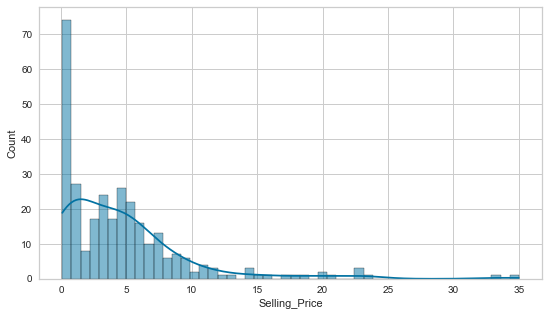

In [165]:
sns.histplot(df["Selling_Price"], bins=50, kde=True);

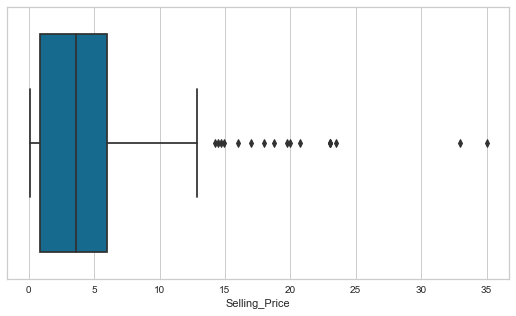

In [166]:
sns.boxplot(df["Selling_Price"]);
# Burada satış fiyatında extreme değerler var. Ancak modelimiz outlierlar ile mücadele edebiliyor.

## Train test split

In [167]:
X = df.drop(columns="Selling_Price")
y = df["Selling_Price"]

In [168]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

## Modeling with Pipeline

In [169]:
cat = X.select_dtypes("object").columns
cat

Index(['Fuel_Type', 'Seller_Type', 'Transmission'], dtype='object')

In [170]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OrdinalEncoder

ord_enc = OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value = -1)
# Burada modelimiz eğer daha önce görmediği bir kategori ile karşılaşırsa ona -1 değerini verecek...

column_trans = make_column_transformer((ord_enc, cat), remainder = "passthrough")
# Burada categorik feature'ları ord_enc ile ordinal yapacak, geriye kalan feature'ları da pass edecek bişey yapmayacak.

In [171]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor

operations = [("OrdinalEncoder", column_trans), ("RF_model", RandomForestRegressor(random_state = 101))]

pipe_model = Pipeline(steps = operations)

pipe_model.fit(X_train, y_train)

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['Fuel_Type', 'Seller_Type', 'Transmission'], dtype='object'))])),
                ('RF_model', RandomForestRegressor(random_state=101))])

In [172]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

def train_val(model, X_train, y_train, X_test, y_test):
    
    y_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)
    
    scores = {"train": {"R2" : r2_score(y_train, y_train_pred),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),                          
    "rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred))},
    
    "test": {"R2" : r2_score(y_test, y_pred),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "rmse" : np.sqrt(mean_squared_error(y_test, y_pred))}}
    
    return pd.DataFrame(scores)

In [173]:
train_val(pipe_model, X_train, y_train, X_test, y_test)
# Burada train R2 skore çok yüksekken test'te düşük çıkmış. Default değerler ile modelimiz overfit gözüküyor.
# Ayrıca rmse ve mae değerleri de birbirine yakın değil. Overfit var diyebiliriz.
# Ancak yine de bir cross_validation yapıp kesin skore'u öğrenmek lazım.

,train,test
R2,0.988,0.767
mae,0.240,0.655
mse,0.370,2.240
rmse,0.609,1.497


In [174]:
from sklearn.model_selection import cross_validate, cross_val_score

operations = [("OrdinalEncoder", column_trans), ("RF_model", RandomForestRegressor(random_state = 101))]

model = Pipeline(steps = operations)

scores = cross_validate(model, X_train, y_train,
                        scoring = ["r2", "neg_mean_absolute_error", "neg_mean_squared_error", "neg_root_mean_squared_error"],
                        cv = 10)

df_scores = pd.DataFrame(scores)
df_scores.mean()[2:]

# Burada test score 88'e yükseldi ancak hala overfit durumu var diyebiliriz. 

test_r2                             0.888
test_neg_mean_absolute_error       -0.697
test_neg_mean_squared_error        -3.112
test_neg_root_mean_squared_error   -1.457
dtype: float64

## Removing Outliers

In [175]:
# Bu bölümde outlier'ları atmanın bizim modelimizde bir iyileşme yapıp yapmayacağını göreceğiz.
# Normalde Modelimiz outlier'lara hassas değil.

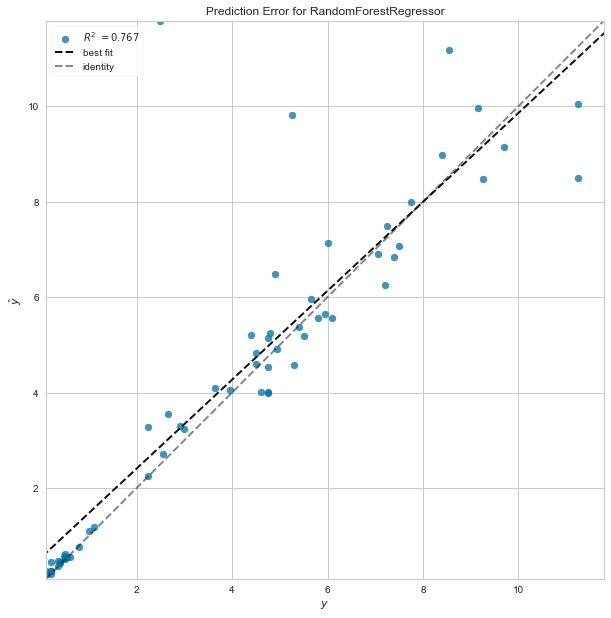

In [176]:
from yellowbrick.regressor import PredictionError
from yellowbrick.features import RadViz

visualizer = RadViz(size = (720, 3000))
model = pipe_model
visualizer = PredictionError(model)

visualizer.fit(X_train, y_train) # Fit the training data to the visualizer
visualizer.score(X_test, y_test) # Evaluate the model on the test data

visualizer.show();

# Burada outlier'ları atmadan önceki skoru görüyoruz.

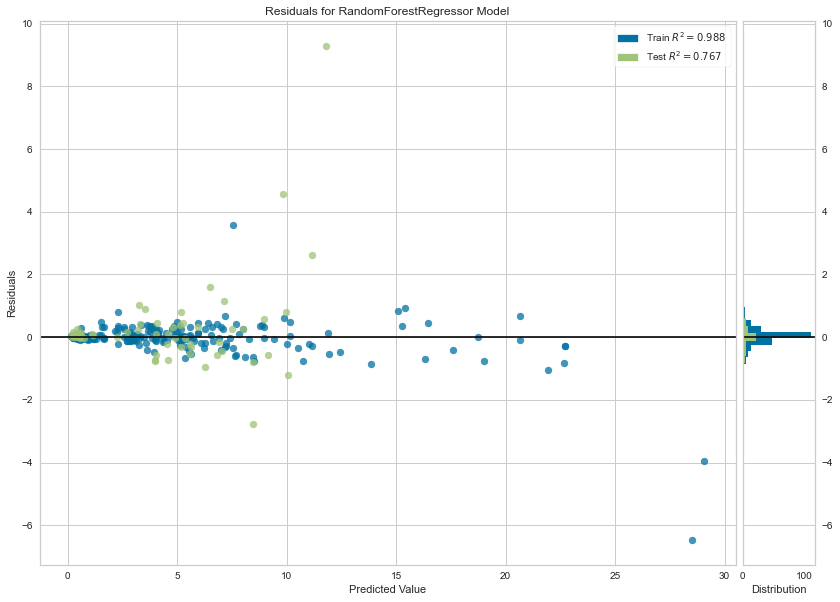

In [177]:
from yellowbrick.regressor import ResidualsPlot

visualizer = RadViz(size=(1000, 720))
model = pipe_model
visualizer = ResidualsPlot(model)

visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)

visualizer.show();

# Burada test ve train dataları için hataların dağılımını görüyoruz.

<AxesSubplot:xlabel='Selling_Price'>

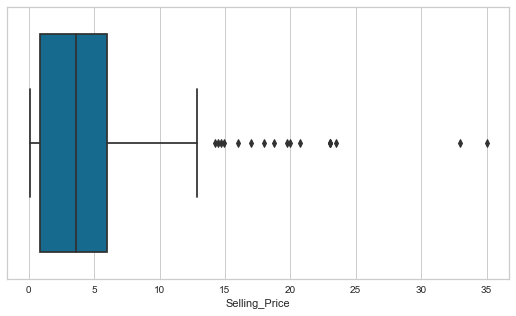

In [178]:
sns.boxplot(df["Selling_Price"])

In [179]:
from scipy.stats import iqr
iqr = iqr(df["Selling_Price"])
iqr

5.1

In [180]:
Q1, Q3 = np.quantile(df["Selling_Price"], [0.25, 0.75])
Q1, Q3

(0.9, 6.0)

In [181]:
min_ = Q1 - iqr * 1.5
max_ = Q3 + iqr * 1.5
min_, max_

(-6.749999999999999, 13.649999999999999)

In [182]:
df[(df["Selling_Price"] < min_) | (df["Selling_Price"] > max_)].index

Int64Index([50, 51, 52, 53, 59, 62, 63, 64, 66, 69, 79, 80, 82, 86, 93, 96, 97], dtype='int64')

In [183]:
len(df[(df["Selling_Price"] < min_) | (df["Selling_Price"] > max_)].index)

17

In [184]:
17 / len(df)
# Burada outlier varsaydığımız değerler datamızın sadece % 5'i . Bunları atmamız datada büyük bir kayıp olmaz.

0.05647840531561462

In [185]:
df_new = df.drop(index= df[(df["Selling_Price"] < min_) | (df["Selling_Price"] > max_)].index)

In [186]:
df_new.shape

(284, 8)

In [187]:
X = df_new.drop(columns="Selling_Price")
y = df_new["Selling_Price"]

In [188]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [190]:
operations = [("OrdinalEncoder", column_trans), ("RF_model", RandomForestRegressor(random_state = 101))]

pipe_model = Pipeline(steps = operations)

pipe_model.fit(X_train, y_train)

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['Fuel_Type', 'Seller_Type', 'Transmission'], dtype='object'))])),
                ('RF_model', RandomForestRegressor(random_state=101))])

In [191]:
train_val(pipe_model, X_train, y_train, X_test, y_test)

,train,test
R2,0.992,0.952
mae,0.177,0.421
mse,0.075,0.422
rmse,0.275,0.650


In [193]:
from sklearn.model_selection import cross_validate, cross_val_score

operations = [("OrdinalEncoder", column_trans), ("RF_model", RandomForestRegressor(random_state = 101))]

scores = cross_validate(model, X_train, y_train,
                        scoring = ["r2", "neg_mean_absolute_error", "neg_mean_squared_error", "neg_root_mean_squared_error"],
                        cv = 5)

df_scores = pd.DataFrame(scores)
df_scores.mean()[2:]

test_r2                             0.933
test_neg_mean_absolute_error       -0.508
test_neg_mean_squared_error        -0.642
test_neg_root_mean_squared_error   -0.786
dtype: float64

**Note :** Burada normalde outlier'ları atmanın modelimizde bir iyileşme yapmasını beklemiyorduk. Çünkü Random Forest modelimiz outlier'lara hassas değildi. Ancak burada dataset çok küçük olduğu için Random Forest modeli iyi çalışmadı ve outlierları atmak score'larımızda ciddi bir iyileşmeyi sağladı.

## Visualizing trees

In [195]:
features = list(X_train.select_dtypes("object").columns) + list(X_train.select_dtypes("number").columns)
features

['Fuel_Type',
 'Seller_Type',
 'Transmission',
 'Present_Price',
 'Kms_Driven',
 'Owner',
 'vehicle_age']

In [196]:
from sklearn.tree import plot_tree

def report_model(model, number_of_tree):
    y_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)
    print("\n")
    print(train_val(model, X_train, y_train, X_test, y_test))
    print("\n")
    
    plt.figure(figsize = (12, 8), dpi = 100)
    plot_tree(model["RF_model"].estimators_[number_of_tree], filled=True, feature_names = features, fontsize = 8);

In [197]:
RF_model = RandomForestRegressor(n_estimators=250, max_depth=4, random_state=101)
operations = [("OrdinalEncoder", column_trans), ("RF_model", RF_model)]

pruned_tree = Pipeline(steps = operations)
pruned_tree.fit(X_train, y_train)

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['Fuel_Type', 'Seller_Type', 'Transmission'], dtype='object'))])),
                ('RF_model',
                 RandomForestRegressor(max_depth=4, n_estimators=250,
                                       random_state=101))])



      train  test
R2    0.958 0.952
mae   0.405 0.462
mse   0.394 0.418
rmse  0.628 0.646




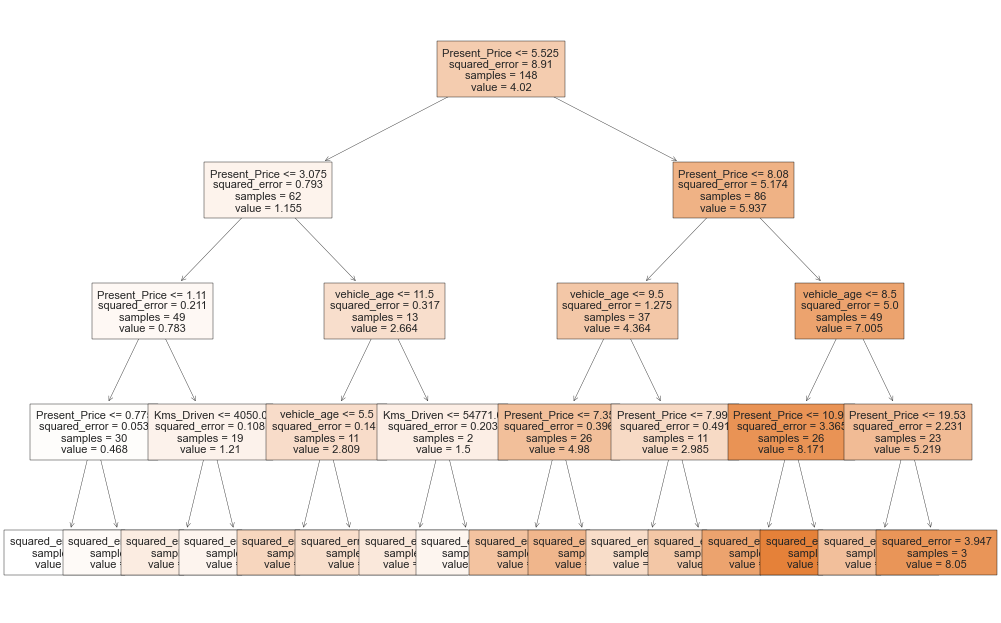

In [200]:
report_model(pruned_tree, 50)
# Burada 50 ağacın modelini görmek istedik.

## GridSearch

In [201]:
from sklearn.model_selection import GridSearchCV

In [202]:
operations = [("OrdinalEncoder", column_trans), ("RF_model", RandomForestRegressor(random_state=101))]

model = Pipeline(steps = operations)

In [225]:
param_grid = {"RF_model__n_estimators":[ 64, 128, 250],
              "RF_model__max_depth": [4,5],
              "RF_model__min_samples_leaf": [1, 2, 3],
              "RF_model__min_samples_split": [2, 3, 5],
              "RF_model__max_features":['auto', 3, 6]}

In [226]:
grid_model = GridSearchCV(estimator = model,
                          param_grid = param_grid,
                          scoring = "neg_root_mean_squared_error",
                          cv = 5,
                          n_jobs = -1)

In [227]:
grid_model.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('OrdinalEncoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ordinalencoder',
                                                                         OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                        unknown_value=-1),
                                                                         Index(['Fuel_Type', 'Seller_Type', 'Transmission'], dtype='object'))])),
                                       ('RF_model',
                                        RandomForestRegressor(random_state=101))]),
             n_jobs=-1,
             param_grid={'RF_model__max_depth': [4, 5],
                         'RF_model__max_features': ['auto', 3, 6],
                         'RF_model__min_samples_leaf': [1, 2, 3],
                         'RF_model__min_samples_split': [2, 3, 5],
                         'RF_model__n_estimators': [64, 128, 250]},
             scoring='neg_root_mean_squared_error')

In [228]:
grid_model.best_params_

{'RF_model__max_depth': 5,
 'RF_model__max_features': 'auto',
 'RF_model__min_samples_leaf': 1,
 'RF_model__min_samples_split': 2,
 'RF_model__n_estimators': 250}

In [229]:
grid_model.best_estimator_

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['Fuel_Type', 'Seller_Type', 'Transmission'], dtype='object'))])),
                ('RF_model',
                 RandomForestRegressor(max_depth=5, max_features='auto',
                                       n_estimators=250, random_state=101))])

In [230]:
grid_model.best_score_
# Burada best score Bize RMSE yi veriyor.

-0.8118222759212074

In [231]:
train_val(grid_model, X_train, y_train, X_test, y_test)

,train,test
R2,0.977,0.956
mae,0.308,0.415
mse,0.213,0.384
rmse,0.461,0.620


In [233]:
from sklearn.model_selection import cross_validate, cross_val_score

operations = [("OrdinalEncoder", column_trans), ("RF_model", RandomForestRegressor(max_depth=5, n_estimators=250,
                                       random_state=101))]

model = Pipeline(steps=operations)

scores = cross_validate(model, X_train, y_train, scoring=['r2', 
            'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], cv = 5)
df_scores = pd.DataFrame(scores)
df_scores.mean()[2:]

test_r2                             0.928
test_neg_mean_absolute_error       -0.522
test_neg_mean_squared_error        -0.674
test_neg_root_mean_squared_error   -0.812
dtype: float64

In [ ]:
# Cross validation sonrası test score'umuz 92.8 çıktı. Train score da 97.7 idi.

## Feature Importance

In [234]:
operations = [("OrdinalEncoder", column_trans), ("RF_model", RandomForestRegressor(max_depth=5, n_estimators=250,
                                       random_state=101))]

pipe_model = Pipeline(steps=operations)

pipe_model.fit(X_train, y_train)

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['Fuel_Type', 'Seller_Type', 'Transmission'], dtype='object'))])),
                ('RF_model',
                 RandomForestRegressor(max_depth=5, n_estimators=250,
                                       random_state=101))])

In [235]:
features = list(X_train.select_dtypes("object").columns) + list(X_train.select_dtypes("number").columns)
features

['Fuel_Type',
 'Seller_Type',
 'Transmission',
 'Present_Price',
 'Kms_Driven',
 'Owner',
 'vehicle_age']

In [236]:
pipe_model["RF_model"].feature_importances_
# buradaki katsayılar direk df ile uyumlu değil. Categoric'ler en başta. Bu yüzden yukarda features tanımladık.

array([1.20596120e-02, 7.19445133e-03, 7.97382231e-04, 8.25830315e-01,
       1.86897718e-02, 4.28254611e-05, 1.35385642e-01])

In [240]:
df_f_i = pd.DataFrame(data = pipe_model["RF_model"].feature_importances_,
                      index = features,
                      columns = ["Feature Importance"])

df_f_i.sort_values(by = "Feature Importance", ascending=False, inplace=True)

df_f_i

,Feature Importance
Present_Price,0.826
vehicle_age,0.135
Kms_Driven,0.019
Fuel_Type,0.012
Seller_Type,0.007
Transmission,0.001
Owner,0.000


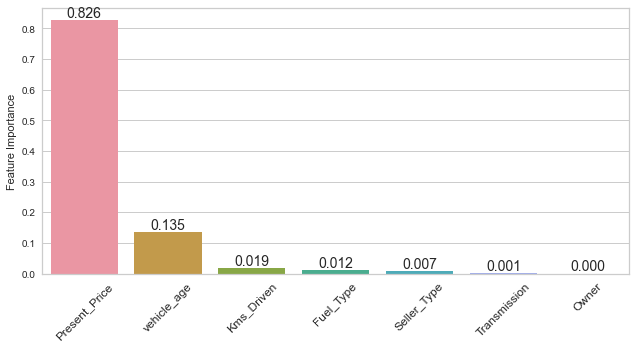

In [256]:
ax = sns.barplot(x = df_f_i.index, y = "Feature Importance", data = df_f_i)

for i in ax.containers:
    ax.bar_label(i, fmt="%.3f", fontsize=14)
    
plt.xticks(rotation = 45, fontsize= 12)
plt.tight_layout()

**Note :** Burada normalde en önemli feature'u atıp yeniden bir skore'lara bakmamız lazımdı ancak burada diğer featureların katsayısı çok küçük eğer atarsam score'larımın iyileşmeyeceğini öngörüyorum...

## Feature Selection

In [258]:
X2 = X[["Present_Price", "vehicle_age", "Kms_Driven"]]
X2.sample(5)

# Burada en önemli 3 feature ile bir daha modelimi deneyeceğim..

,Present_Price,vehicle_age,Kms_Driven
65,6.950,8,45000
100,1.900,6,3000
70,6.760,8,71000
206,7.130,5,12479
181,0.480,6,50000


In [260]:
X_train,X_test,y_train,y_test=train_test_split(X2, y,test_size=0.2, random_state=101)

In [263]:
cat2 = [] # X2 dataframe içinde categoric bir feature olmadığı için burada cat = [] yazdık. 

ord_enc = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

column_trans = make_column_transformer((ord_enc, cat2), remainder='passthrough')


operations = [("OrdinalEncoder", column_trans), ("RF_model", RandomForestRegressor(max_depth=5, n_estimators=250,
                                       random_state=101))]

pipe_model = Pipeline(steps=operations)
pipe_model.fit(X_train,y_train)
train_val(pipe_model, X_train, y_train, X_test, y_test)

,train,test
R2,0.971,0.959
mae,0.335,0.404
mse,0.275,0.358
rmse,0.525,0.598


In [262]:
pipe_model.feature_names_in_

array(['Present_Price', 'vehicle_age', 'Kms_Driven'], dtype=object)

In [267]:
operations = [("OrdinalEncoder", column_trans), ("RF_model", RandomForestRegressor(max_depth=5, n_estimators=250,
                                       random_state=101))]

model = Pipeline(steps=operations)
scores = cross_validate(model, X_train, y_train, scoring=['r2', 
            'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], cv = 10)
df_scores = pd.DataFrame(scores)
df_scores.mean()[2:]

test_r2                             0.921
test_neg_mean_absolute_error       -0.526
test_neg_mean_squared_error        -0.727
test_neg_root_mean_squared_error   -0.819
dtype: float64

## Final Model

In [269]:
# 3 feature ile model oluşturmaya karar verdim.
X2.head()

,Present_Price,vehicle_age,Kms_Driven
0,5.590,8,27000
1,9.540,9,43000
2,9.850,5,6900
3,4.150,11,5200
4,6.870,8,42450


In [271]:
pd.DataFrame(column_trans.fit_transform(X2)).head()

,0,1,2
0,5.590,8.000,27000.000
1,9.540,9.000,43000.000
2,9.850,5.000,6900.000
3,4.150,11.000,5200.000
4,6.870,8.000,42450.000


In [272]:
cat

Index(['Fuel_Type', 'Seller_Type', 'Transmission'], dtype='object')

In [273]:
cat2 = []

ord_enc = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

column_trans = make_column_transformer((ord_enc, cat2), remainder='passthrough')


operations = [("OrdinalEncoder", column_trans), ("RF_model", RandomForestRegressor(max_depth=5, n_estimators=250,
                                       random_state=101))]

pipe_model = Pipeline(steps=operations)
pipe_model.fit(X2, y)

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  [])])),
                ('RF_model',
                 RandomForestRegressor(max_depth=5, n_estimators=250,
                                       random_state=101))])

## Prediction

In [274]:
samples = {"Present_Price": [7, 9.5],
           "Kms_Driven": [25000, 44000],
           "Fuel_Type":["Petrol", "Diesel"],
           'Seller_Type':['Dealer', 'Individual'],
           'Transmission': ['Manual', 'Automatic'],
           "Owner":[0,1],
           "vehicle_age":[1, 9]}

In [275]:
df_samples = pd.DataFrame(samples)
df_samples

,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,vehicle_age
0,7.000,25000,Petrol,Dealer,Manual,0,1
1,9.500,44000,Diesel,Individual,Automatic,1,9


In [276]:
pipe_model.predict(df_samples)
# Burada verilen 2 aracın şu anki fiyatını tahmin ettik.

array([5.37115251, 5.31938496])